In [8]:
#full image
from keras import layers
from keras import optimizers
from keras import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
import os

conv_base = InceptionV3(include_top=False,
                        weights='imagenet',
                       input_shape=(150,150,3))

base_dir ='E:\\KDEF\\KDEF_fullFace'
train_dir = os.path.join(base_dir,'KDEF_B')
validation_dir = os.path.join(base_dir,'KDEF_A')

batch_size = 128

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=batch_size)

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation='softmax'))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-4),
              metrics=['acc'])

model.save('inceptionV3_KEDF_FULLFace.h5')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=200,
            validation_data=validation_generator,
            validation_steps=validation_steps)

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(1,len(train_acc)+1)

plt.plot(epoch,train_acc,'r',label='train accuracy')
plt.plot(epoch,val_acc,'g',label='validation accuracy')
plt.title('train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch,train_loss,'r',label='train loss')
plt.plot(epoch,val_loss,'g',label='validation loss')
plt.title('train nad validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Found 2446 images belonging to 7 classes.
Found 2443 images belonging to 7 classes.
Epoch 1/200
20/20 [==============================] - 549s 27s/step - loss: 2.6636 - acc: 0.1370 - val_loss: 1.9919 - val_acc: 0.1437
Epoch 2/200
20/20 [==============================] - 529s 26s/step - loss: 2.0401 - acc: 0.1402 - val_loss: 2.0131 - val_acc: 0.1482
Epoch 3/200
20/20 [==============================] - 524s 26s/step - loss: 2.0241 - acc: 0.1496 - val_loss: 1.8924 - val_acc: 0.2235
Epoch 4/200
20/20 [==============================] - 525s 26s/step - loss: 1.9881 - acc: 0.1852 - val_loss: 1.8738 - val_acc: 0.1912
Epoch 5/200
20/20 [==============================] - 526s 26s/step - loss: 1.9117 - acc: 0.2150 - val_loss: 5.6604 - val_acc: 0.2501
Epoch 6/200
20/20 [==============================] - 531s 27s/step - loss: 1.8574 - acc: 0.2543 - val_loss: 3.0219 - val_acc: 0.2354
Epoch 7/200
20/20 [==============================] - 526s 26s/step - loss: 1.7656 - acc: 0.2919 - val_loss: 2.1795 - v

KeyboardInterrupt: 

Found 2446 images belonging to 7 classes.
Found 2443 images belonging to 7 classes.
Epoch 1/200
20/20 [==============================] - 392s 20s/step - loss: 2.7460 - acc: 0.1549 - val_loss: 2.2454 - val_acc: 0.1596
Epoch 2/200
20/20 [==============================] - 372s 19s/step - loss: 1.9897 - acc: 0.1783 - val_loss: 1.9109 - val_acc: 0.2133
Epoch 3/200
20/20 [==============================] - 372s 19s/step - loss: 1.8905 - acc: 0.2535 - val_loss: 2.3468 - val_acc: 0.2186
Epoch 4/200
20/20 [==============================] - 374s 19s/step - loss: 1.7388 - acc: 0.3144 - val_loss: 2.5644 - val_acc: 0.2824
Epoch 5/200
20/20 [==============================] - 372s 19s/step - loss: 1.5310 - acc: 0.4047 - val_loss: 3.3652 - val_acc: 0.2652
Epoch 6/200
20/20 [==============================] - 373s 19s/step - loss: 1.3125 - acc: 0.4849 - val_loss: 2.2829 - val_acc: 0.3332
Epoch 7/200
20/20 [==============================] - 370s 18s/step - loss: 1.1316 - acc: 0.5670 - val_loss: 2.1357 - v

20/20 [==============================] - 394s 20s/step - loss: 0.1649 - acc: 0.9669 - val_loss: 0.0337 - val_acc: 0.8666
Epoch 123/200
20/20 [==============================] - 367s 18s/step - loss: 0.1435 - acc: 0.9526 - val_loss: 1.1688 - val_acc: 0.8887
Epoch 124/200
20/20 [==============================] - 363s 18s/step - loss: 0.1002 - acc: 0.9693 - val_loss: 0.0941 - val_acc: 0.8944
Epoch 125/200
20/20 [==============================] - 367s 18s/step - loss: 0.0888 - acc: 0.9661 - val_loss: 0.3010 - val_acc: 0.9046
Epoch 126/200
20/20 [==============================] - 378s 19s/step - loss: 0.1221 - acc: 0.9644 - val_loss: 0.7698 - val_acc: 0.8031
Epoch 127/200
20/20 [==============================] - 372s 19s/step - loss: 0.2168 - acc: 0.9387 - val_loss: 1.3115 - val_acc: 0.7491
Epoch 128/200
20/20 [==============================] - 387s 19s/step - loss: 0.1359 - acc: 0.9526 - val_loss: 0.0016 - val_acc: 0.8269
Epoch 129/200
20/20 [==============================] - 381s 19s/step 

Epoch 183/200
20/20 [==============================] - 337s 17s/step - loss: 0.0522 - acc: 0.9816 - val_loss: 0.0012 - val_acc: 0.9128
Epoch 184/200
20/20 [==============================] - 337s 17s/step - loss: 0.0441 - acc: 0.9836 - val_loss: 0.2880 - val_acc: 0.8588
Epoch 185/200
20/20 [==============================] - 337s 17s/step - loss: 0.0533 - acc: 0.9849 - val_loss: 0.0162 - val_acc: 0.8993
Epoch 186/200
20/20 [==============================] - 338s 17s/step - loss: 0.0845 - acc: 0.9759 - val_loss: 0.7179 - val_acc: 0.8350
Epoch 187/200
20/20 [==============================] - 337s 17s/step - loss: 0.0719 - acc: 0.9751 - val_loss: 0.5898 - val_acc: 0.8932
Epoch 188/200
20/20 [==============================] - 337s 17s/step - loss: 0.1675 - acc: 0.9571 - val_loss: 1.3557 - val_acc: 0.8305
Epoch 189/200
20/20 [==============================] - 339s 17s/step - loss: 0.0992 - acc: 0.9681 - val_loss: 0.1799 - val_acc: 0.8776
Epoch 190/200
20/20 [==============================] - 

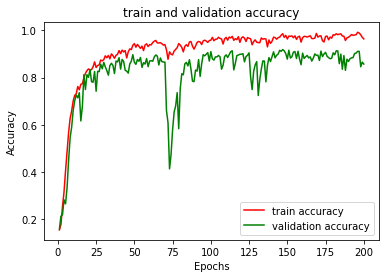

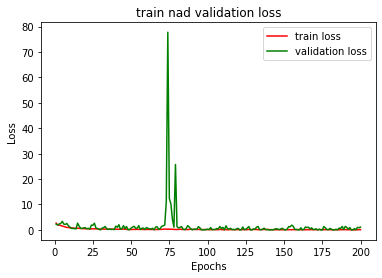

In [3]:
#local image
from keras import layers
from keras import optimizers
from keras import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
import os

conv_base = InceptionV3(include_top=False,
                        weights='imagenet',
                       input_shape=(150,150,3))

base_dir ='E:\\KDEF\\KDEF_localFace'
train_dir = os.path.join(base_dir,'KDEF_B')
validation_dir = os.path.join(base_dir,'KDEF_A')

batch_size = 128

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=batch_size)

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation='softmax'))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-4),
              metrics=['acc'])

model.save('inceptionV3_KEDF_localFace.h5')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=200,
            validation_data=validation_generator,
            validation_steps=validation_steps)

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(1,len(train_acc)+1)

plt.plot(epoch,train_acc,'r',label='train accuracy')
plt.plot(epoch,val_acc,'g',label='validation accuracy')
plt.title('train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch,train_loss,'r',label='train loss')
plt.plot(epoch,val_loss,'g',label='validation loss')
plt.title('train nad validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [1]:
# import tensorflow
# from tensorflow.keras import layers
# from tensorflow.keras import optimizers
# from tensorflow.keras import Sequential
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# import os

from keras import layers
from keras import optimizers
from keras import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
import os

conv_base = InceptionV3(include_top=False,
                        weights='imagenet',
                        input_shape=(150,150,3))

base_dir ='E:\\Datasets\\Facial_image\\jaffe'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

batch_size = 128

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=batch_size)

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation='softmax'))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-4),
              metrics=['acc'])
model.save('inceptionV3_jaffe.h5')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=1,
            validation_data=validation_generator,
            validation_steps=validation_steps)

#model.save('inceptionV3_jaffe.h5')

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(1,len(train_acc)+1)

plt.plot(epoch,train_acc,'r',label='train accuracy')
plt.plot(epoch,val_acc,'g',label='validation accuracy')
plt.title('train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch,train_loss,'r',label='train loss')
plt.plot(epoch,val_loss,'g',label='validation loss')
plt.title('train nad validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Using TensorFlow backend.
C:\Users\CHENTIEJUN\AppData\Roaming\Python\Python37\site-packages\keras_preprocessing\image\utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 143 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


AttributeError: module 'keras.optimizers' has no attribute 'TFOptimizer'

In [3]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2.1.0
2.3.1


Found 958 images belonging to 7 classes.
Found 436 images belonging to 7 classes.
Epoch 1/200
8/8 [==============================] - 169s 21s/step - loss: 3.9495 - acc: 0.1534 - val_loss: 3.4740 - val_acc: 0.1330
Epoch 2/200
8/8 [==============================] - 149s 19s/step - loss: 1.9566 - acc: 0.1973 - val_loss: 2.9762 - val_acc: 0.1881
Epoch 3/200
8/8 [==============================] - 149s 19s/step - loss: 1.9062 - acc: 0.1879 - val_loss: 2.0282 - val_acc: 0.1651
Epoch 4/200
8/8 [==============================] - 149s 19s/step - loss: 1.9037 - acc: 0.1806 - val_loss: 1.9072 - val_acc: 0.1743
Epoch 5/200
8/8 [==============================] - 153s 19s/step - loss: 1.8903 - acc: 0.2244 - val_loss: 2.0587 - val_acc: 0.1789
Epoch 6/200
8/8 [==============================] - 150s 19s/step - loss: 1.9213 - acc: 0.1983 - val_loss: 1.9214 - val_acc: 0.1766
Epoch 7/200
8/8 [==============================] - 153s 19s/step - loss: 1.8894 - acc: 0.1973 - val_loss: 2.0713 - val_acc: 0.1881
E

Epoch 124/200
8/8 [==============================] - 159s 20s/step - loss: 0.0930 - acc: 0.9666 - val_loss: 4.4325 - val_acc: 0.2110
Epoch 125/200
8/8 [==============================] - 156s 19s/step - loss: 0.1140 - acc: 0.9656 - val_loss: 4.7080 - val_acc: 0.2202
Epoch 126/200
8/8 [==============================] - 154s 19s/step - loss: 0.1146 - acc: 0.9572 - val_loss: 5.9004 - val_acc: 0.2271
Epoch 127/200
8/8 [==============================] - 158s 20s/step - loss: 0.0905 - acc: 0.9687 - val_loss: 5.3856 - val_acc: 0.2133
Epoch 128/200
8/8 [==============================] - 162s 20s/step - loss: 0.0998 - acc: 0.9635 - val_loss: 4.8022 - val_acc: 0.1904
Epoch 129/200
8/8 [==============================] - 161s 20s/step - loss: 0.0661 - acc: 0.9739 - val_loss: 4.9121 - val_acc: 0.2133
Epoch 130/200
8/8 [==============================] - 157s 20s/step - loss: 0.0906 - acc: 0.9781 - val_loss: 4.6503 - val_acc: 0.2661
Epoch 131/200
8/8 [==============================] - 164s 21s/step - 

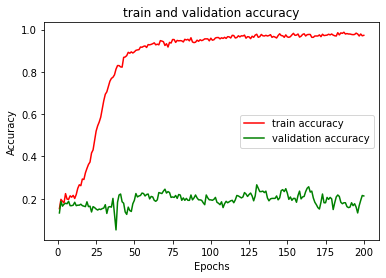

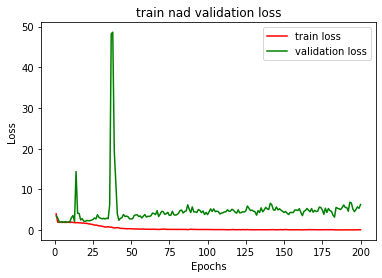

In [4]:
#SFEW dataset
from keras import layers
from keras import optimizers
from keras import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
import os

conv_base = InceptionV3(include_top=False,
                        weights='imagenet',
                       input_shape=(150,150,3))

base_dir ='E:\\Datasets\\Facial_image\\SFEW'
train_dir = os.path.join(base_dir,'training')
validation_dir = os.path.join(base_dir,'validation')

batch_size = 128

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=batch_size)

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation='softmax'))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-4),
              metrics=['acc'])

model.save('inceptionV3_sfew.h5')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=200,
            validation_data=validation_generator,
            validation_steps=validation_steps)

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(1,len(train_acc)+1)

plt.plot(epoch,train_acc,'r',label='train accuracy')
plt.plot(epoch,val_acc,'g',label='validation accuracy')
plt.title('train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch,train_loss,'r',label='train loss')
plt.plot(epoch,val_loss,'g',label='validation loss')
plt.title('train nad validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Found 4928 images belonging to 7 classes.
Found 2107 images belonging to 7 classes.
Epoch 1/200
39/39 [==============================] - 632s 16s/step - loss: 2.5693 - acc: 0.1416 - val_loss: 1.9376 - val_acc: 0.1547
Epoch 2/200
39/39 [==============================] - 619s 16s/step - loss: 1.9791 - acc: 0.1585 - val_loss: 1.9474 - val_acc: 0.1946
Epoch 3/200
39/39 [==============================] - 622s 16s/step - loss: 1.7913 - acc: 0.2679 - val_loss: 1.5090 - val_acc: 0.3835
Epoch 4/200
39/39 [==============================] - 625s 16s/step - loss: 1.2983 - acc: 0.4515 - val_loss: 2.0680 - val_acc: 0.4276
Epoch 5/200
39/39 [==============================] - 621s 16s/step - loss: 0.9500 - acc: 0.6209 - val_loss: 1.4227 - val_acc: 0.6232
Epoch 6/200
39/39 [==============================] - 619s 16s/step - loss: 0.7433 - acc: 0.7106 - val_loss: 1.3258 - val_acc: 0.6796
Epoch 7/200
39/39 [==============================] - 618s 16s/step - loss: 0.6017 - acc: 0.7739 - val_loss: 0.9056 - v

39/39 [==============================] - 632s 16s/step - loss: 0.0858 - acc: 0.9706 - val_loss: 0.1788 - val_acc: 0.9378
Epoch 123/200
39/39 [==============================] - 634s 16s/step - loss: 0.0732 - acc: 0.9748 - val_loss: 0.1431 - val_acc: 0.9592
Epoch 124/200
39/39 [==============================] - 640s 16s/step - loss: 0.0682 - acc: 0.9744 - val_loss: 0.0554 - val_acc: 0.9772
Epoch 125/200
39/39 [==============================] - 639s 16s/step - loss: 0.0790 - acc: 0.9736 - val_loss: 0.7436 - val_acc: 0.9459
Epoch 126/200
39/39 [==============================] - 636s 16s/step - loss: 0.0684 - acc: 0.9777 - val_loss: 0.0241 - val_acc: 0.9592
Epoch 127/200
39/39 [==============================] - 629s 16s/step - loss: 0.0717 - acc: 0.9773 - val_loss: 0.0854 - val_acc: 0.9815
Epoch 128/200
39/39 [==============================] - 629s 16s/step - loss: 0.0619 - acc: 0.9787 - val_loss: 0.0205 - val_acc: 0.9611
Epoch 129/200
39/39 [==============================] - 634s 16s/step 

Epoch 183/200
39/39 [==============================] - 635s 16s/step - loss: 0.0669 - acc: 0.9759 - val_loss: 0.1127 - val_acc: 0.9734
Epoch 184/200
39/39 [==============================] - 634s 16s/step - loss: 0.0515 - acc: 0.9830 - val_loss: 0.0646 - val_acc: 0.9682
Epoch 185/200
39/39 [==============================] - 637s 16s/step - loss: 0.0619 - acc: 0.9781 - val_loss: 0.0019 - val_acc: 0.9862
Epoch 186/200
39/39 [==============================] - 641s 16s/step - loss: 0.0642 - acc: 0.9779 - val_loss: 0.0177 - val_acc: 0.9748
Epoch 187/200
39/39 [==============================] - 636s 16s/step - loss: 0.0801 - acc: 0.9732 - val_loss: 0.1930 - val_acc: 0.9725
Epoch 188/200
39/39 [==============================] - 636s 16s/step - loss: 0.0543 - acc: 0.9797 - val_loss: 0.0032 - val_acc: 0.9791
Epoch 189/200
39/39 [==============================] - 637s 16s/step - loss: 0.0757 - acc: 0.9771 - val_loss: 0.0026 - val_acc: 0.9582
Epoch 190/200
39/39 [==============================] - 

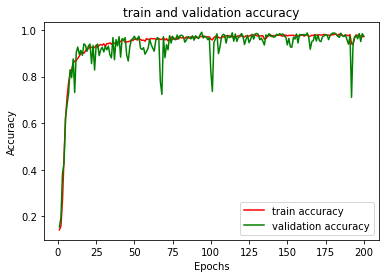

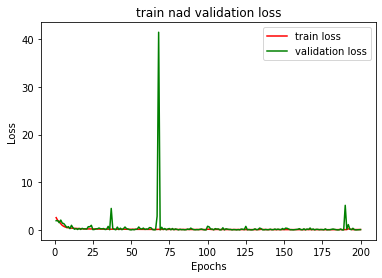

In [2]:
#RaFD dataset
from keras import layers
from keras import optimizers
from keras import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
import os

conv_base = InceptionV3(include_top=False,
                        weights='imagenet',
                       input_shape=(150,150,3))

base_dir ='E:\\Datasets\\Facial_image\\RaFD'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

batch_size = 128

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=batch_size)

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation='softmax'))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-4),
              metrics=['acc'])

model.save('inceptionV3_rafd.h5')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=200,
            validation_data=validation_generator,
            validation_steps=validation_steps)

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(1,len(train_acc)+1)

plt.plot(epoch,train_acc,'r',label='train accuracy')
plt.plot(epoch,val_acc,'g',label='validation accuracy')
plt.title('train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch,train_loss,'r',label='train loss')
plt.plot(epoch,val_loss,'g',label='validation loss')
plt.title('train nad validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/100
225/225 [==============================] - 4704s 21s/step - loss: 1.9053 - acc: 0.2487 - val_loss: 1.9972 - val_acc: 0.3504
Epoch 2/100
225/225 [==============================] - 4572s 20s/step - loss: 1.4863 - acc: 0.4299 - val_loss: 1.4755 - val_acc: 0.4869
Epoch 3/100
225/225 [==============================] - 4569s 20s/step - loss: 1.2726 - acc: 0.5171 - val_loss: 1.1155 - val_acc: 0.5507
Epoch 4/100
225/225 [==============================] - 4534s 20s/step - loss: 1.1805 - acc: 0.5561 - val_loss: 0.8485 - val_acc: 0.5946
Epoch 5/100
225/225 [==============================] - 4540s 20s/step - loss: 1.1105 - acc: 0.5833 - val_loss: 0.8259 - val_acc: 0.6025
Epoch 6/100
225/225 [==============================] - 4527s 20s/step - loss: 1.0602 - acc: 0.6070 - val_loss: 0.5957 - val_acc: 0.6078
Epoch 7/100
225/225 [==============================] - 4527s 20s/step - loss: 1.0352 - acc: 0.6118 

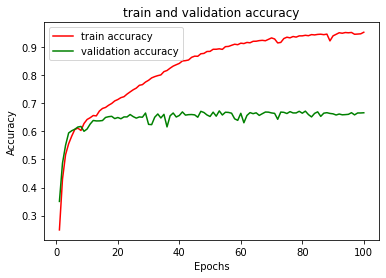

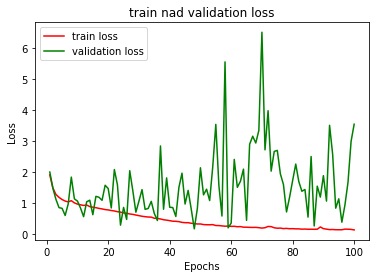

In [6]:
#fer2013 dataset
from keras import layers
from keras import optimizers
from keras import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
import os

conv_base = InceptionV3(include_top=False,
                        weights='imagenet',
                       input_shape=(150,150,3))

base_dir ='E:\\Datasets\\Facial_image\\fer2013'
train_dir = os.path.join(base_dir,'Training')
validation_dir = os.path.join(base_dir,'validation')

batch_size = 128

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=batch_size)

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation='softmax'))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-4),
              metrics=['acc'])

model.save('inceptionV3_fer2013.h5')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=validation_steps)

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(1,len(train_acc)+1)

plt.plot(epoch,train_acc,'r',label='train accuracy')
plt.plot(epoch,val_acc,'g',label='validation accuracy')
plt.title('train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch,train_loss,'r',label='train loss')
plt.plot(epoch,val_loss,'g',label='validation loss')
plt.title('train nad validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Found 5480 images belonging to 7 classes.
Found 1813 images belonging to 7 classes.
Found 1813 images belonging to 7 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 43 steps, validate for 15 steps
43/43 [==============================] - 812s 19s/step - loss: 2.3361 - acc: 0.1405 - val_loss: 1.9572 - val_acc: 0.1953
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
Test evaluate: [2.018293619155884, 0.20132378]


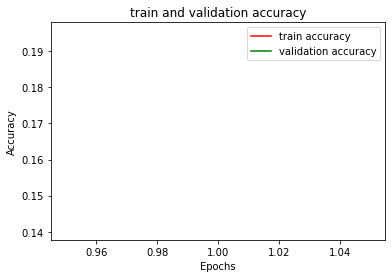

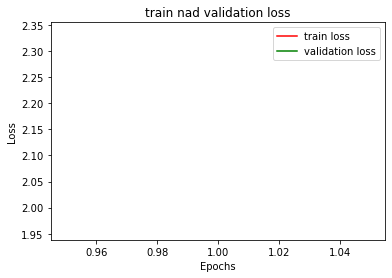

In [10]:
#integrationDataset
from keras import layers
from keras import optimizers
from keras import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
import os

conv_base = InceptionV3(include_top=False,
                        weights='imagenet',
                       input_shape=(150,200,3))

base_dir ='E:\\RGB_dataset'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

batch_size = 128

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,200),
                batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,200),
                batch_size=batch_size)

test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(150,200),
                batch_size=batch_size)

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation='softmax'))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)
steps = len(test_generator)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-4),
              metrics=['acc'])

history = model.fit_generator(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=1,
            validation_data=validation_generator,
            validation_steps=validation_steps)

model.save('inceptionV3_integrationDataset.h5')

evaluate = model.evaluate_generator(
            test_generator,
            steps=steps)

print('Test evaluate: {}'.format(evaluate))

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(1,len(train_acc)+1)

plt.plot(epoch,train_acc,'r',label='train accuracy')
plt.plot(epoch,val_acc,'g',label='validation accuracy')
plt.title('train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch,train_loss,'r',label='train loss')
plt.plot(epoch,val_loss,'g',label='validation loss')
plt.title('train nad validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()